In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [17]:
# Define the path and classes
base_path = r'D:\ML PROJECT\Balanced_top'
classes = ['Cyst', 'Normal', 'Stone', 'Tumor']


In [18]:
# Load images and labels
data = []
labels = []

for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (300, 300))  # Resize images to 300x300
        data.append(image)
        labels.append(classes.index(class_name))


In [19]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize the data
data = data / 255.0


In [20]:
# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(classes))


In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


## CNN Model Architecture

In [42]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3), kernel_regularizer=l2(0.001)),  # Reduced filters to 16
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Reduced filters to 32
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Reduced filters to 64
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.6),  # Increased dropout rate to 0.6
    Dense(len(classes), activation='softmax')
])

In [43]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 149, 149, 16)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 73, 73, 32)       

In [44]:
# Train the model with the new input size
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/30
15/15 [==============================] - 44s 3s/step - loss: 2.8008 - accuracy: 0.3573 - val_loss: 1.7588 - val_accuracy: 0.3833
Epoch 2/30
15/15 [==============================] - 40s 3s/step - loss: 1.6489 - accuracy: 0.4896 - val_loss: 1.6327 - val_accuracy: 0.5417
Epoch 3/30
15/15 [==============================] - 41s 3s/step - loss: 1.3641 - accuracy: 0.6021 - val_loss: 1.3151 - val_accuracy: 0.6542
Epoch 4/30
15/15 [==============================] - 63s 4s/step - loss: 1.0353 - accuracy: 0.7583 - val_loss: 0.9049 - val_accuracy: 0.8625
Epoch 5/30
15/15 [==============================] - 69s 5s/step - loss: 0.7782 - accuracy: 0.8479 - val_loss: 0.6666 - val_accuracy: 0.9417
Epoch 6/30
15/15 [==============================] - 41s 3s/step - loss: 0.6672 - accuracy: 0.8823 - val_loss: 0.5249 - val_accuracy: 0.9583
Epoch 7/30
15/15 [==============================] - 37s 3s/step - loss: 0.5385 - accuracy: 0.9271 - val_loss: 0.4524 - val_accuracy: 0.9792
Epoch 8/30
15/15 [==

In [49]:
# Get the training accuracy and loss from the history object
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

# Print the final training and validation accuracy/loss
print(f"Final Training Accuracy: {train_accuracy[-1] * 100:.2f}%")
print(f"Final Training Loss: {train_loss[-1]:.4f}")

Final Training Accuracy: 98.44%
Final Training Loss: 0.2858


In [50]:
# Get the validation accuracy and loss from the history object
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f"Final Validation Accuracy: {val_accuracy[-1] * 100:.2f}%")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")

Final Validation Accuracy: 98.75%
Final Validation Loss: 0.3006


8/8 [==============================] - 4s 477ms/step


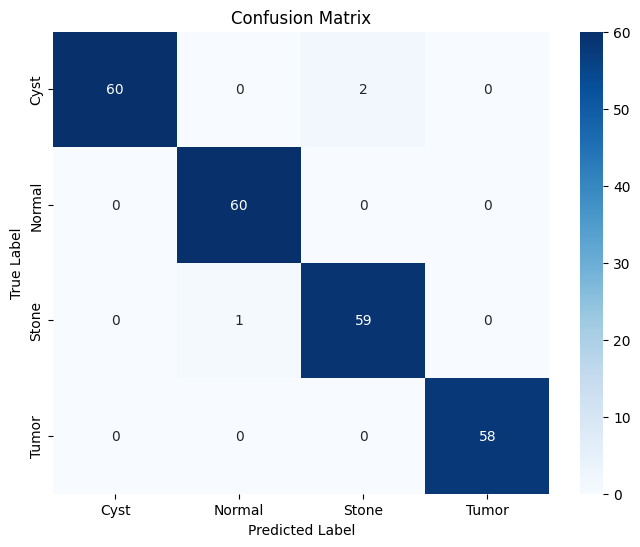

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [54]:
# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=classes)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Cyst       1.00      0.97      0.98        62
      Normal       0.98      1.00      0.99        60
       Stone       0.97      0.98      0.98        60
       Tumor       1.00      1.00      1.00        58

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240



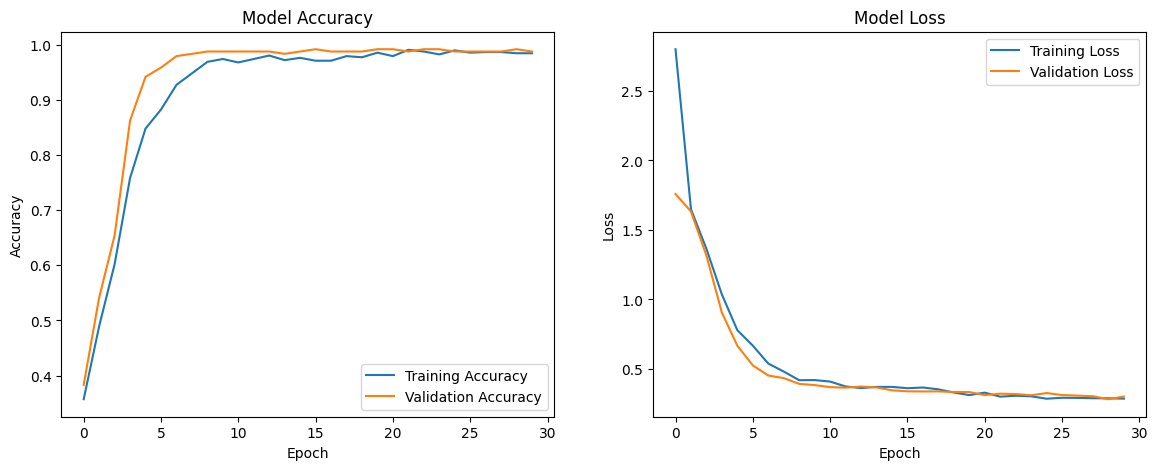

In [48]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.show()